# <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> Bangladesh Road Safety Analysis </div>
    
<div style="font-size: 16px; text-align: center;">
    <h4>This project aims to comprehensively analyze road accident trends in Bangladesh from 1980 to 2023, providing valuable insights to enhance road safety measures and minimize accidents, injuries, and fatalities.</h3>
</div>

<br> <!-- Adding a line gap -->

<div style="text-align:center;">
    <img src="https://gitlab.com/msjahid/images/-/raw/main/_5be30a59-a522-451f-8db9-e919f000bcbc.jpeg" alt="Road Safety Analysis" />
</div>

# <div style="background: #6b8272; border-radius: 90px; font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> PROJECT OVERVIEW </div>
    
* [INTRODUCTION](#1)
* [CONFIGURATION](#2)
    * [LIBRARY DEPENDENCIES](#2.1)
    * [DATA SOURCE & PREPARATION](#2.2)    
* [PREPROCESSING](#3)
    * [DATA CLEANING](#3.1)
    * [DATA EXPLORATION](#3.2)
* [EXPLORATORY DATA ANALYSIS](#4)



<a id="1"></a>
# <div style="background: #6b8272; border-radius: 90px; font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> INTRODUCTION </div>

<div style="font-size: 18px; padding: 50px; margin: 20px; border: 6px ridge limegreen; float: left; text-align: left; border-radius: 45px 20px 18px 80px; background: #eae1d7;">This dataset provides a comprehensive record of road accidents in Bangladesh spanning from 1980 to 2024. The analysis aims to shed light on the trends and patterns of road accidents over the years, offering insights into factors contributing to these incidents and their impacts. By examining variables such as the number of accidents, fatalities, serious injuries, minor injuries, moderate injuries, and severe injuries, we seek to understand the dynamics of road safety in Bangladesh.
<br><br>   

<b><i>Summary of the Dataset:</b></i>
    <br>
<u style="font-size: 17px; color: #7a4241;"><b>1. Year:</b></u> The year in which the road accident occurred.<br>
<u style="font-size: 17px; color: #7a4241;"><b>2. Number of Accidents:</b></u> Total number of reported road accidents.<br>
<u style="font-size: 17px; color: #7a4241;"><b>3. Death:</b></u> Total number of fatalities resulting from road accidents.<br>
<u style="font-size: 17px; color: #7a4241;"><b>4. Number of Serious Injuries:</b></u> Total number of serious injuries sustained in road accidents.<br>
<u style="font-size: 17px; color: #7a4241;"><b>5. Number of Minor Injuries:</b></u> Total number of minor injuries sustained in road accidents.<br>
<u style="font-size: 17px; color: #7a4241;"><b>6. Number of Moderate Injuries:</b></u> Total number of moderate injuries sustained in road accidents.<br>
<u style="font-size: 17px; color: #7a4241;"><b>7. Number of Severe Injuries:</b></u> Total number of severe injuries sustained in road accidents.<br>
</div>

<a id="2"></a>
## <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> CONFIGURATION </div>
    
* <b>Libraries: </b>The analysis utilizes Python libraries such as Pandas, Matplotlib, scipy, calendar, and Seaborn for data manipulation and visualization.
* <b>Dataset:</b> The dataset utilized for this analysis encompasses detailed information regarding road accidents in Bangladesh spanning from 1980 to 2024. It incorporates essential variables including Year, Number of Accidents, Death, Number of Serious Injuries, Number of Minor Injuries, Number of Moderate Injuries, and Number of Severe Injuries, offering a comprehensive overview of road safety incidents in the country.



In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

from datetime import datetime  # Importing the datetime class from the datetime module

from scipy import stats # statistical functions

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: user 1.21 s, sys: 461 ms, total: 1.67 s
Wall time: 2.46 s


<a id="2.2"></a>
# <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 70%; text-align: center; border-bottom: 0.3px solid #004466;"> Loading and Preparing the Dataset </div>

In [2]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('/kaggle/input/road-accident-statistics-in-bangladesh/road_accident_statistics.csv')
    print("Dataset loaded successfully.")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print("Error: File not found. Please check the file path.")

except Exception as e:
    # Handle other exceptions
    print("An error occurred while loading the dataset:", e)

print();
collect();

Dataset loaded successfully.

CPU times: user 83.1 ms, sys: 1.66 ms, total: 84.7 ms
Wall time: 89.8 ms


<a id="3"></a>
# <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> DATA PREPROCESSING </div>
    
1. <b>Data Cleaning: </b>
* Handling Missing Values
* Duplicate Values
* Data Type Conversations

This stage involves preparing the dataset for analysis by addressing missing values and ensuring uniform data types.

2. <b>Data Exploration:</b>
* Descriptive Statistics
* Dataset Shape Analysis

This phase focuses on exploring the dataset's characteristics through statistical summaries and understanding its structure and dimensions.

<a id="3.1"></a>
## <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 70%; text-align: center; border-bottom: 0.3px solid #004466;"> Data Cleaning ( Column formating, Missing values, duplicate values, data type ) </div>

In [3]:
# check the columns name
df.columns

Index(['Year', 'Number of Accidents', 'Death', 'Number of Serious Injuries',
       'Number of Minor Injuries', 'Number of Moderate Injuries',
       'Number of Severe Injuries'],
      dtype='object')

In [4]:
%%time

# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify the new column names
print("\nNew column names:")
print(df.columns)

print();
collect();


New column names:
Index(['year', 'number_of_accidents', 'death', 'number_of_serious_injuries',
       'number_of_minor_injuries', 'number_of_moderate_injuries',
       'number_of_severe_injuries'],
      dtype='object')

CPU times: user 78.9 ms, sys: 966 µs, total: 79.9 ms
Wall time: 79.6 ms


In [5]:
# Checking the null values in the dataset
df.isna().sum()

year                           0
number_of_accidents            0
death                          0
number_of_serious_injuries     0
number_of_minor_injuries       0
number_of_moderate_injuries    0
number_of_severe_injuries      0
dtype: int64

In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   year                         44 non-null     int64
 1   number_of_accidents          44 non-null     int64
 2   death                        44 non-null     int64
 3   number_of_serious_injuries   44 non-null     int64
 4   number_of_minor_injuries     44 non-null     int64
 5   number_of_moderate_injuries  44 non-null     int64
 6   number_of_severe_injuries    44 non-null     int64
dtypes: int64(7)
memory usage: 2.5 KB


In [7]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


<a id="3.2"></a>
# <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 70%; text-align: center; border-bottom: 0.3px solid #004466;"> Data Exploration </div>

In [8]:
# Checking the data shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 44 rows and 7 columns


In [9]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='ocean')

,year,number_of_accidents,death,number_of_serious_injuries,number_of_minor_injuries,number_of_moderate_injuries,number_of_severe_injuries
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2001.500000,772.727273,613.636364,518.750000,138.272727,69.113636,34.522727
std,12.845233,358.688591,344.620390,337.015156,121.502486,60.777220,30.429093
min,1980.000000,200.000000,50.000000,25.000000,2.000000,1.000000,0.000000
25%,1990.750000,487.500000,337.500000,237.500000,17.500000,8.750000,4.500000
50%,2001.500000,750.000000,600.000000,500.000000,120.000000,60.000000,30.000000
75%,2012.250000,1012.500000,862.500000,762.500000,225.000000,112.500000,56.250000
max,2023.000000,1500.000000,1300.000000,1200.000000,400.000000,200.000000,100.000000


<a id="5"></a>
# <div style="background: #6b8272;font-family: monospace; font-weight: bold; font-size: 110%; text-align: center; border-bottom: 0.3px solid #004466;"> EXPLORATORY DATA ANALYSIS(EDA) </div>
    
Univariate Analysis:

* Visualize the distribution of numerical variables using histograms or density plots.
* Explore categorical variables using bar plots or count plots to understand their frequency distribution.

Bivariate Analysis:

* Analyze relationships between pairs of variables using scatter plots (for numerical variables) or grouped bar plots (for categorical variables).
* Calculate correlation coefficients between numerical variables to measure the strength and direction of linear relationships.


Visualizing distributions of variables (histograms, kernel density plots)
Summary statistics (box plots, violin plots)
Pairwise relationships (scatter plots, pair plots)

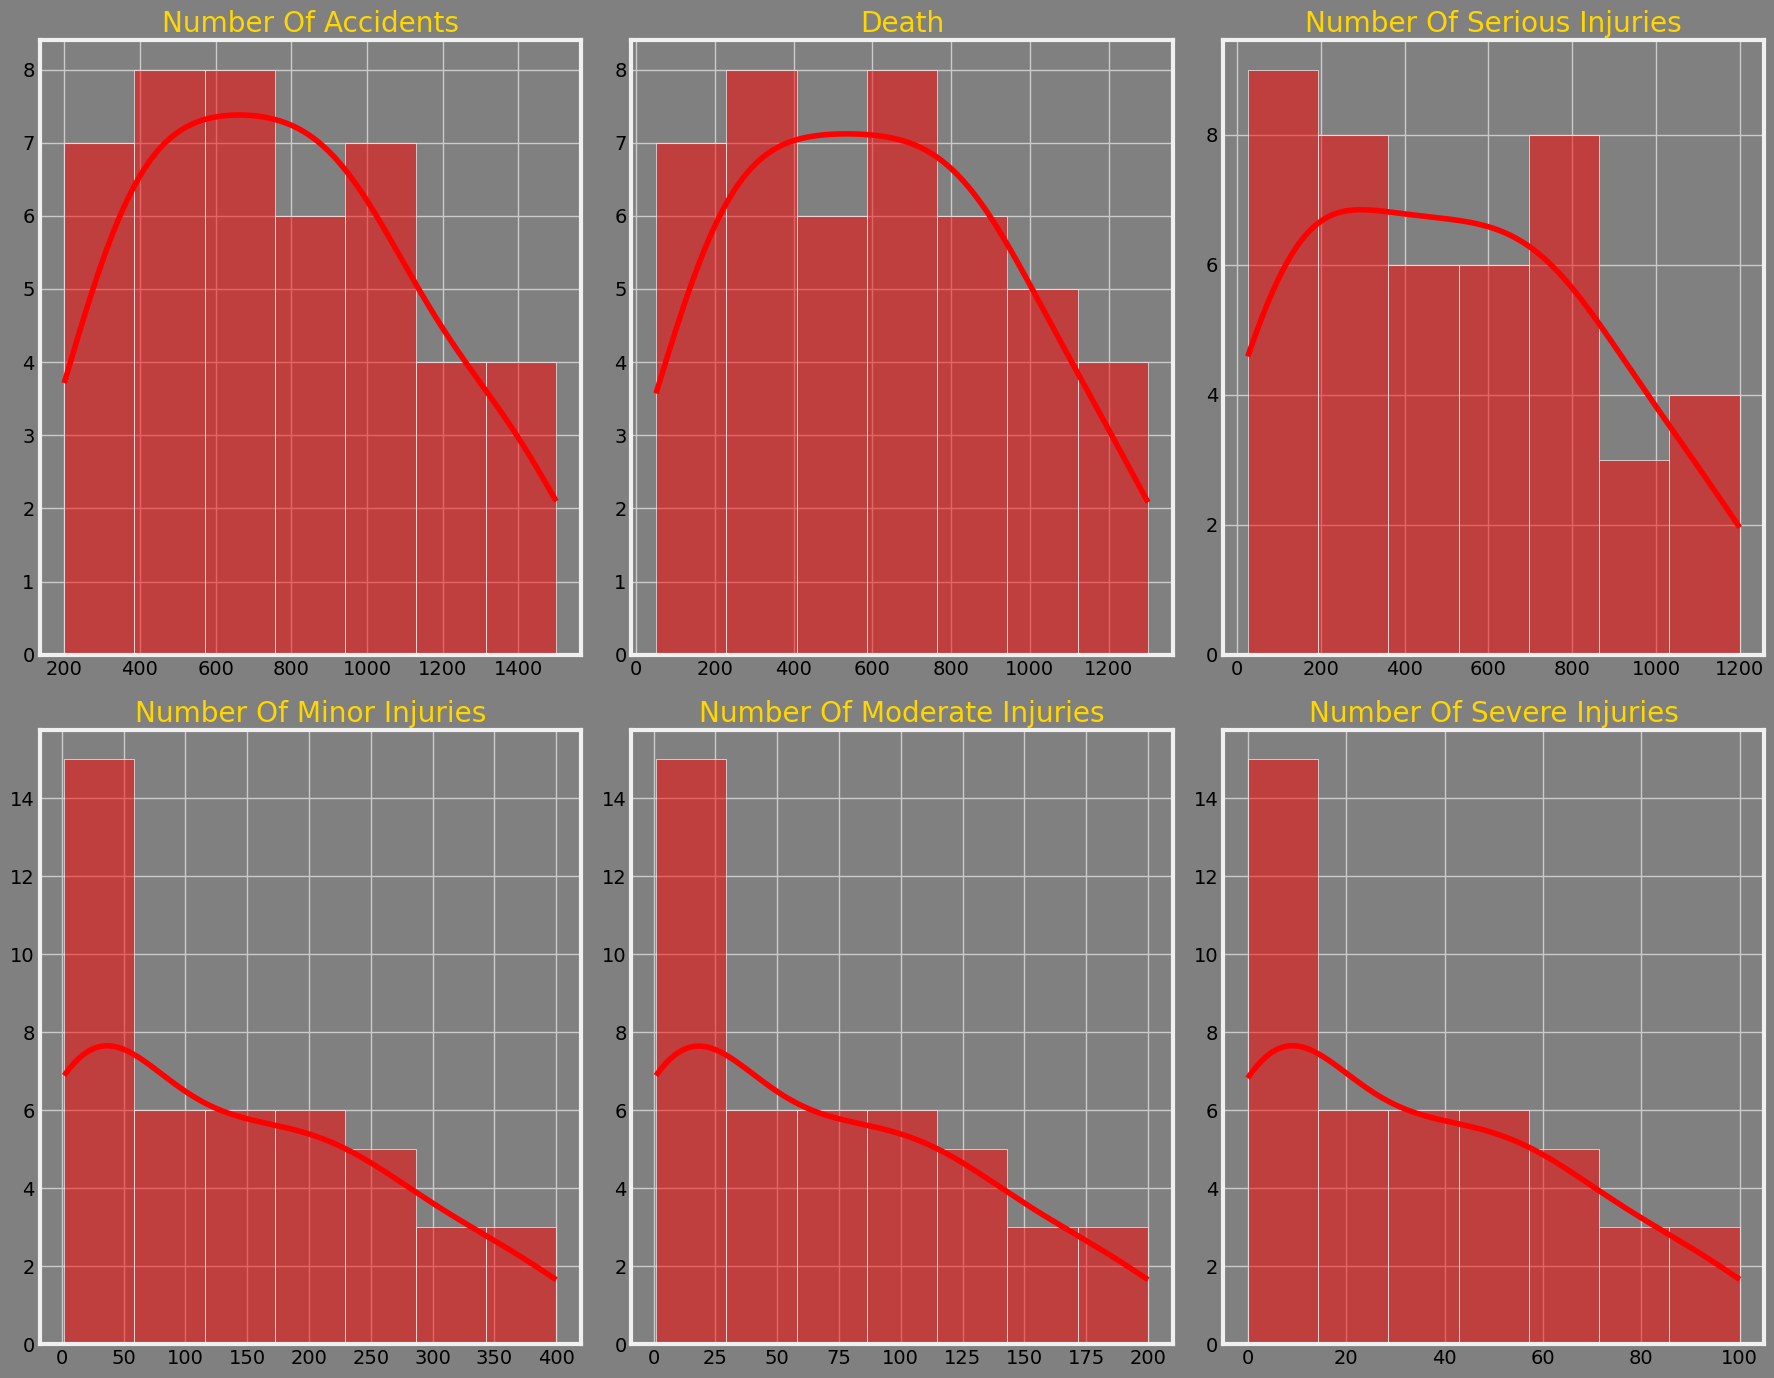

In [10]:
# List of features
features = ['number_of_accidents', 'death', 'number_of_serious_injuries',
            'number_of_minor_injuries', 'number_of_moderate_injuries',
            'number_of_severe_injuries']

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 14), facecolor='gray')

# Flatten axes for easier iteration
axs = axs.flatten()

# Set subplot background color
subplot_color = 'gray'

# Loop through each column in your dataset
for i, col in enumerate(features):
    sns.histplot(data=df, x=col, color='red', kde=True, ax=axs[i])
    axs[i].set_facecolor(subplot_color)  # Set subplot background color
    
    # Set plot title
    title = col.replace('_', ' ').title()  # Convert column name to title format
    axs[i].set_title(title, color='gold', fontname='Latin Modern Roman Light')
    
    # Set empty x-label and y-label
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<div style="background: #F3E5E3; padding: 20px; font-family: monospace; font-size: 18px; margin: 20px; border: 6px ridge red; float: left; text-align: left; border-radius: 45px 20px 18px 80px; background: #eae1d7">
    <strong style="font-size: 22px; color: #26090b; font-weight: bold">📖 Conclusion</strong><br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Accidents:</u></b> The number of accidents is increasing, indicating a right-skewed distribution as there is a steady increase in the number of accidents throughout the years.<br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Death:</u></b> The number of deaths is also increasing, with the line representing the number of deaths following an upward trend, suggesting a right-skewed distribution.<br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Serious Injuries:</u></b> Similarly, the number of serious injuries is on the rise, with the line representing this metric also showing an upward trend, indicative of a right-skewed distribution.<br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Minor Injuries:</u></b> Moreover, the number of minor injuries is on the rise, with the line depicting an upward trend, suggesting a right-skewed distribution in the data.<br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Moderate Injuries:</u></b> Furthermore, there appears to be an increase in the number of moderate injuries, as evidenced by the upward trend in the corresponding line, indicating a right-skewed distribution.<br>
    <br>
    <u style="font-size: 17px; color: #7a4241;"><b>Number of Severe Injuries:</u></b> Additionally, the number of severe injuries is increasing, with the line depicting an upward trend, mirroring the increase seen in other injury categories and suggesting a right-skewed distribution overall.<br>
    <br>
</div>

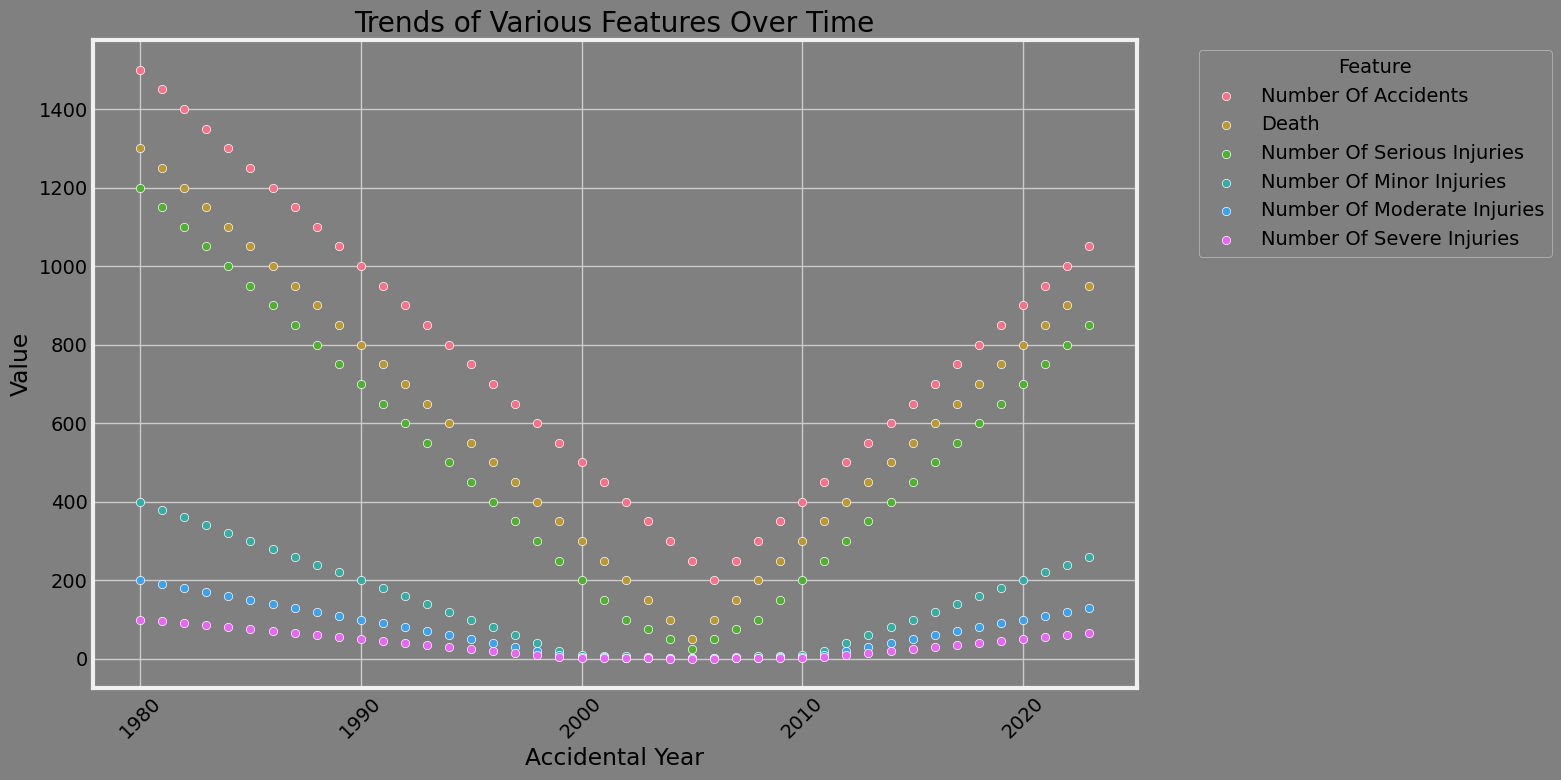

In [11]:
# Set the background color of the entire plot
plt.figure(figsize=(12, 8), facecolor='gray')
plt.gca().set_facecolor('gray')

# List of features
features = ['number_of_accidents', 'death', 'number_of_serious_injuries',
            'number_of_minor_injuries', 'number_of_moderate_injuries',
            'number_of_severe_injuries']

# Create a color palette for each feature
palette = sns.color_palette("husl", len(features))

# Create scatter plot for each feature
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x='year', y=feature, 
                    label=feature.replace('_', ' ').title(), 
                    color=palette[i])

# Add labels and title
plt.xlabel('Accidental Year')
plt.ylabel('Value')
plt.title('Trends of Various Features Over Time')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='gray')

# Show plot
plt.show()